# **Importations des donnees**

In [519]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#data split
from sklearn.model_selection import train_test_split
#encondage des donnees
from sklearn.preprocessing import LabelEncoder
# Standarisation des donnees
from sklearn.preprocessing import StandardScaler
# detection des outliers

# nan value
from sklearn.impute import SimpleImputer
# machine learning model 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# evaluation de model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# enrengistrement de model

# **Data decovery**

In [520]:
df = pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [522]:
df.shape

(418, 12)

In [523]:
print(len(df))

418


In [524]:
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [525]:
( df.isna().sum() / df.shape[0] * 100)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

<Axes: >

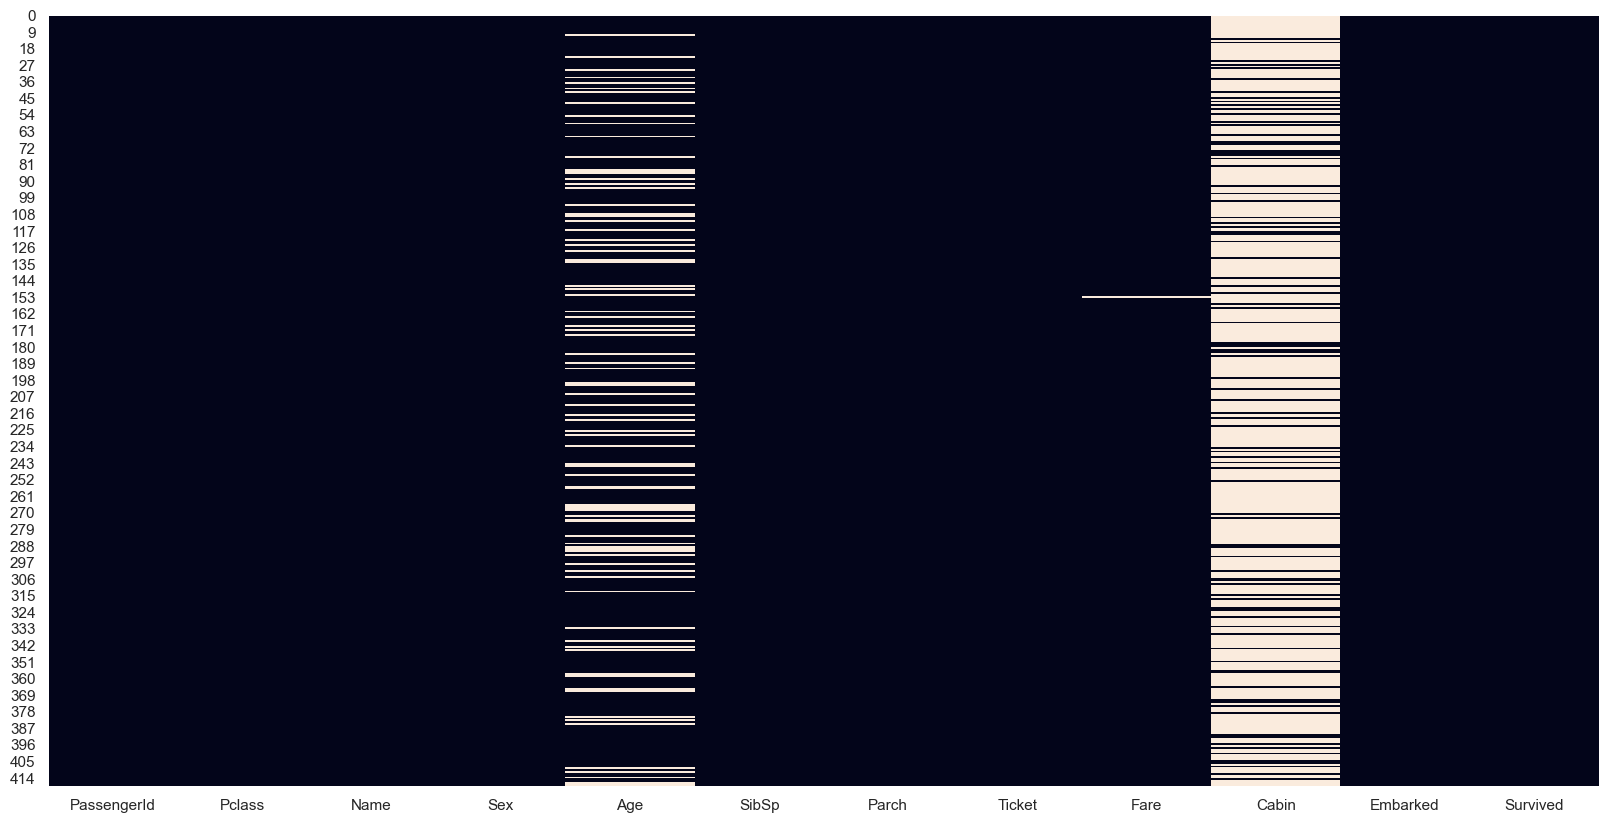

In [526]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [527]:
for review in df['Survived'].unique():
    print(review)

0
1


In [528]:
for review in df['Pclass'].unique():
    print(review)

3
2
1


In [529]:
for review in df['Name'].unique():
    print(review)

Kelly, Mr. James
Wilkes, Mrs. James (Ellen Needs)
Myles, Mr. Thomas Francis
Wirz, Mr. Albert
Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Svensson, Mr. Johan Cervin
Connolly, Miss. Kate
Caldwell, Mr. Albert Francis
Abrahim, Mrs. Joseph (Sophie Halaut Easu)
Davies, Mr. John Samuel
Ilieff, Mr. Ylio
Jones, Mr. Charles Cresson
Snyder, Mrs. John Pillsbury (Nelle Stevenson)
Howard, Mr. Benjamin
Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)
del Carlo, Mrs. Sebastiano (Argenia Genovesi)
Keane, Mr. Daniel
Assaf, Mr. Gerios
Ilmakangas, Miss. Ida Livija
Assaf Khalil, Mrs. Mariana (Miriam")"
Rothschild, Mr. Martin
Olsen, Master. Artur Karl
Flegenheim, Mrs. Alfred (Antoinette)
Williams, Mr. Richard Norris II
Ryerson, Mrs. Arthur Larned (Emily Maria Borie)
Robins, Mr. Alexander A
Ostby, Miss. Helene Ragnhild
Daher, Mr. Shedid
Brady, Mr. John Bertram
Samaan, Mr. Elias
Louch, Mr. Charles Alexander
Jefferys, Mr. Clifford Thomas
Dean, Mrs. Bertram (Eva Georgetta Light)
Johnston, Mrs. Andrew G 

In [530]:
for review in df['Sex'].unique():
    print(review)

male
female


In [531]:
for review in df['Age'].unique():
    print(review)

34.5
47.0
62.0
27.0
22.0
14.0
30.0
26.0
18.0
21.0
nan
46.0
23.0
63.0
24.0
35.0
45.0
55.0
9.0
48.0
50.0
22.5
41.0
33.0
18.5
25.0
39.0
60.0
36.0
20.0
28.0
10.0
17.0
32.0
13.0
31.0
29.0
28.5
32.5
6.0
67.0
49.0
2.0
76.0
43.0
16.0
1.0
12.0
42.0
53.0
26.5
40.0
61.0
60.5
7.0
15.0
54.0
64.0
37.0
34.0
11.5
8.0
0.33
38.0
57.0
40.5
0.92
19.0
36.5
0.75
0.83
58.0
0.17
59.0
14.5
44.0
5.0
51.0
3.0
38.5


In [532]:
for review in df['SibSp'].unique():
    print(review)

0
1
2
3
4
5
8


In [533]:
for review in df['Parch'].unique():
    print(review)

0
1
3
2
4
6
5
9


In [534]:
for review in df['Ticket'].unique():
    print(review)

330911
363272
240276
315154
3101298
7538
330972
248738
2657
A/4 48871
349220
694
21228
24065
W.E.P. 5734
SC/PARIS 2167
233734
2692
STON/O2. 3101270
2696
PC 17603
C 17368
PC 17598
PC 17597
PC 17608
A/5. 3337
113509
2698
113054
2662
SC/AH 3085
C.A. 31029
C.A. 2315
W./C. 6607
13236
2682
342712
315087
345768
1601
349256
113778
SOTON/O.Q. 3101263
237249
11753
STON/O 2. 3101291
PC 17594
370374
11813
C.A. 37671
13695
SC/PARIS 2168
29105
19950
SC/A.3 2861
382652
349230
348122
386525
349232
237216
347090
334914
F.C.C. 13534
330963
113796
2543
382653
349211
3101297
PC 17562
113503
359306
11770
248744
368702
2678
PC 17483
19924
349238
240261
2660
330844
A/4 31416
364856
29103
347072
345498
F.C. 12750
376563
13905
350033
19877
STON/O 2. 3101268
347471
A./5. 3338
11778
228414
365235
347070
2625
C 4001
330920
383162
3410
248734
237734
330968
PC 17531
329944
2680
2681
PP 9549
13050
SC/AH 29037
C.A. 33595
367227
392095
368783
371362
350045
367226
211535
342441
STON/OQ. 369943
113780
4133
2621
349226
3

In [535]:
for review in df['Fare'].unique():
    print(review)

7.8292
7.0
9.6875
8.6625
12.2875
9.225
7.6292
29.0
7.2292
24.15
7.8958
26.0
82.2667
61.175
27.7208
12.35
7.225
7.925
59.4
3.1708
31.6833
61.3792
262.375
14.5
61.9792
30.5
21.6792
31.5
20.575
23.45
57.75
8.05
9.5
56.4958
13.4167
26.55
7.85
13.0
52.5542
29.7
7.75
76.2917
15.9
60.0
15.0333
23.0
263.0
15.5792
29.125
7.65
16.1
13.5
7.725
21.0
7.8792
42.4
28.5375
211.5
25.7
15.2458
221.7792
10.7083
14.4542
13.9
7.775
52.0
7.7958
78.85
7.8542
55.4417
8.5167
22.525
7.8208
8.7125
15.0458
7.7792
31.6792
7.2833
6.4375
16.7
75.2417
15.75
7.25
23.25
28.5
25.4667
46.9
151.55
18.0
51.8625
83.1583
nan
12.1833
31.3875
7.55
13.775
7.7333
22.025
50.4958
34.375
8.9625
39.0
36.75
53.1
247.5208
16.0
69.55
32.5
134.5
10.5
8.1125
15.5
14.4
227.525
25.7417
7.05
73.5
42.5
164.8667
13.8583
27.4458
15.1
65.0
6.4958
71.2833
75.25
106.425
30.0
7.8875
27.75
136.7792
9.325
17.4
12.7375
0.0
20.2125
39.6
6.95
81.8583
41.5792
45.5
9.35
93.5
14.1083
7.575
135.6333
146.5208
211.3375
79.2
15.7417
7.5792
512.3292
63.3583
51

In [536]:
for review in df['Cabin'].unique():
    print(review)

nan
B45
E31
B57 B59 B63 B66
B36
A21
C78
D34
D19
A9
D15
C31
C23 C25 C27
F G63
B61
C53
D43
C130
C132
C101
C55 C57
B71
C46
C116
F
A29
G6
C6
C28
C51
E46
C54
C97
D22
B10
F4
E45
E52
D30
B58 B60
E34
C62 C64
A11
B11
C80
F33
C85
D37
C86
D21
C89
F E46
A34
D
B26
C22 C26
B69
C32
B78
F E57
F2
A18
C106
B51 B53 B55
D10 D12
E60
E50
E39 E41
B52 B54 B56
C39
B24
D28
B41
C7
D40
D38
C105


In [537]:
for review in df['Embarked'].unique():
    print(review)

Q
S
C


# the conclusion
pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

cabin	Cabin number

fare	Passenger fare

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Some children travelled only with a nanny, therefore parch=0 for them.

# **Preprocessing data**

# feature selection

In [538]:
df = df.drop('Name',axis=1)
df = df.drop('Ticket',axis=1)
df = df.drop('Cabin',axis=1)
df = df.drop('Fare',axis=1)
df = df.drop('PassengerId',axis=1)

In [539]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,34.5,0,0,Q,0
1,3,female,47.0,1,0,S,0
2,2,male,62.0,0,0,Q,0
3,3,male,27.0,0,0,S,0
4,3,female,22.0,1,1,S,1


# dealing with the null values 

<Axes: >

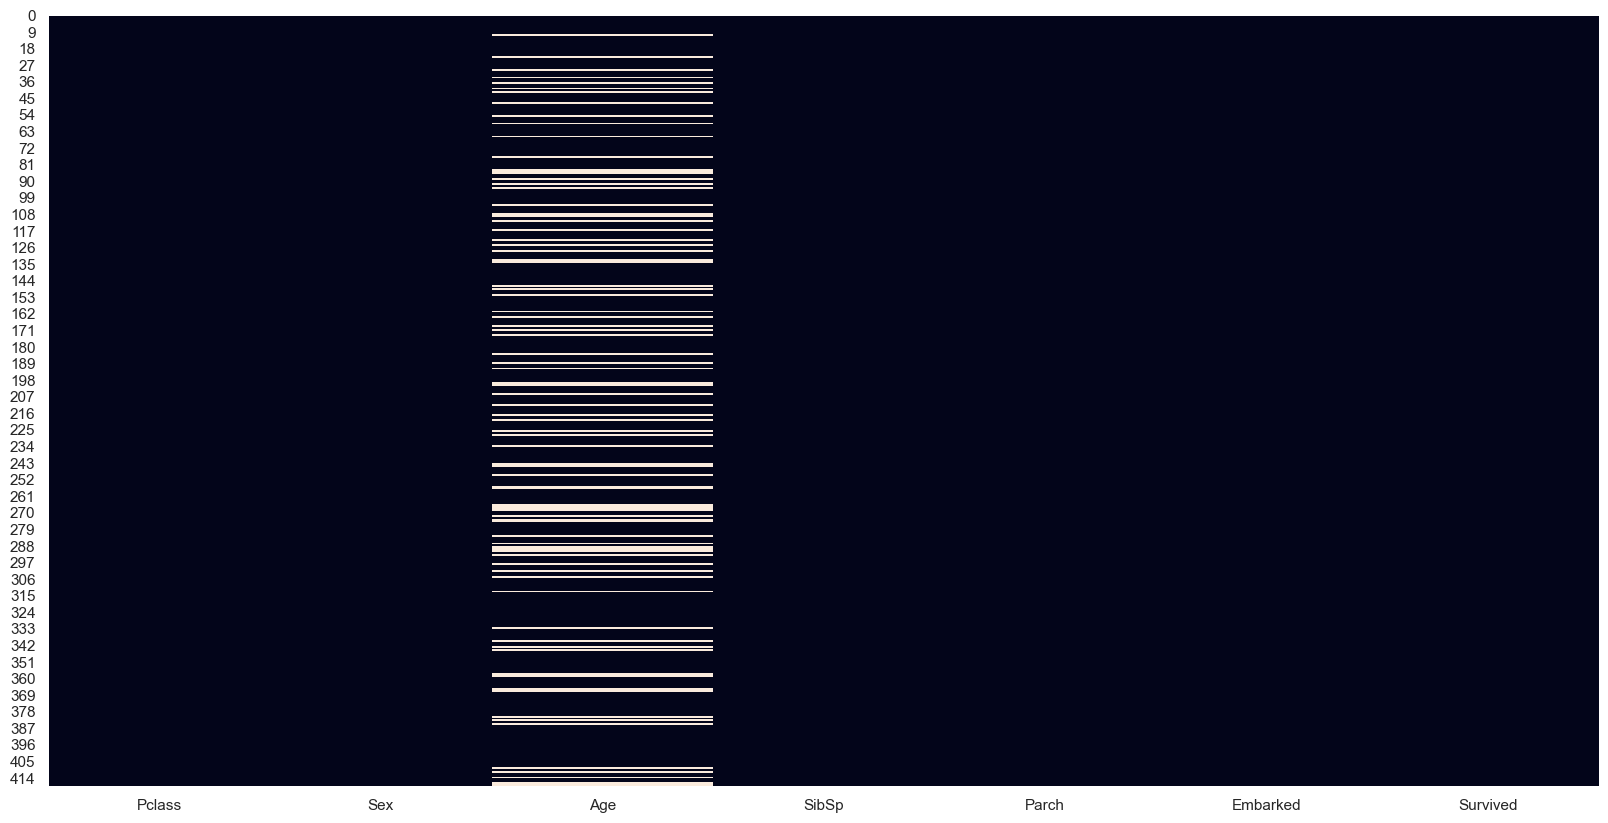

In [540]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [541]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)  # Specify the number of neighbors

# Apply the imputer to the relevant columns
df[['Age']] = knn_imputer.fit_transform(df[['Age']])

<Axes: >

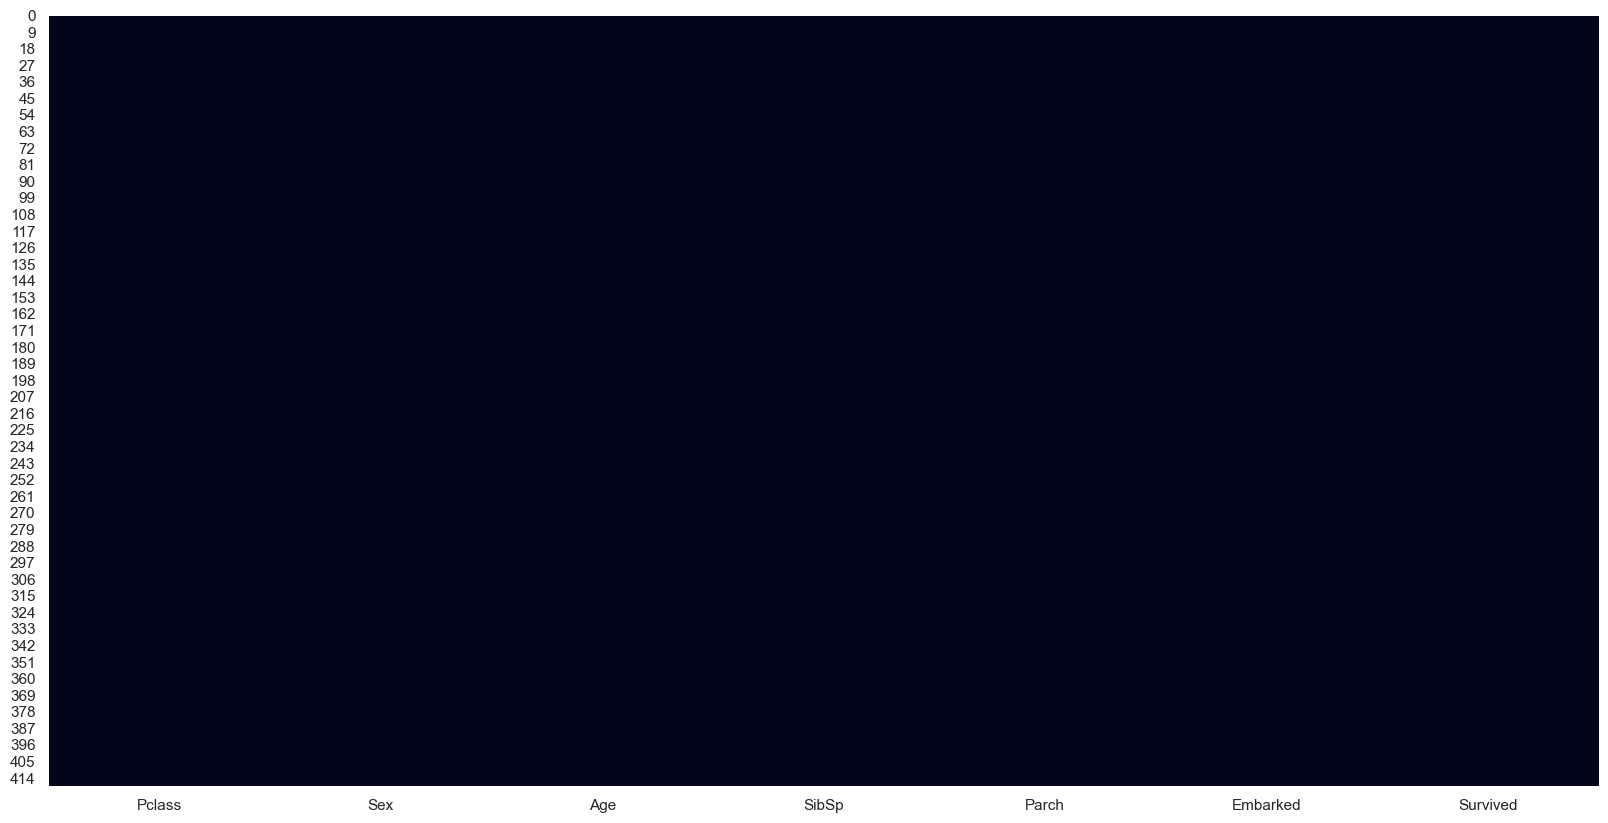

In [542]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    object 
 6   Survived  418 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


In [544]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int32  
 6   Survived  418 non-null    int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 19.7 KB


In [546]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,34.5,0,0,1,0
1,3,0,47.0,1,0,2,0
2,2,1,62.0,0,0,1,0
3,3,1,27.0,0,0,2,0
4,3,0,22.0,1,1,2,1


# applying feature engeeniring

In [547]:
df['isalone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)

In [548]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived,isalone
0,3,1,34.5,0,0,1,0,1
1,3,0,47.0,1,0,2,0,0
2,2,1,62.0,0,0,1,0,1
3,3,1,27.0,0,0,2,0,1
4,3,0,22.0,1,1,2,1,0


In [549]:
df = df.drop(['SibSp', 'Parch'], axis=1)

In [550]:
df.head()

,Pclass,Sex,Age,Embarked,Survived,isalone
0,3,1,34.5,1,0,1
1,3,0,47.0,2,0,0
2,2,1,62.0,1,0,1
3,3,1,27.0,2,0,1
4,3,0,22.0,2,1,0


 # dealing with outliers

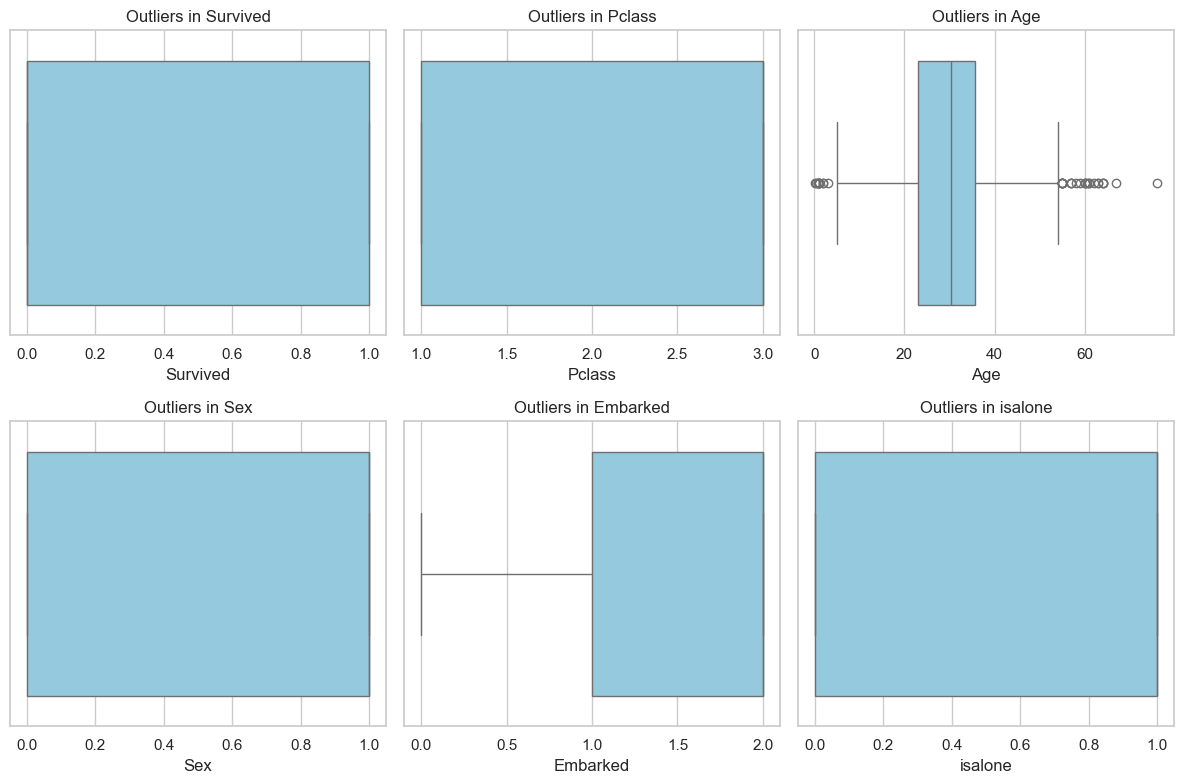

In [551]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize outliers for numerical columns using boxplots
def plot_outliers(data, columns):
    plt.figure(figsize=(12, 8))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)  # Adjust the subplot grid as needed
        if data[col].dtype != 'object':  # Only boxplot for numerical columns
            sns.boxplot(x=data[col], color='skyblue')
            plt.title(f'Outliers in {col}')
        else:
            # For categorical columns, visualize the distribution with a bar plot
            sns.countplot(x=data[col], palette='coolwarm')
            plt.title(f'Distribution of {col}')
        
        plt.tight_layout()
    plt.show()

# Numerical columns to check for outliers
numerical_columns = ['Survived', 'Pclass', 'Age']
# Categorical columns to check distribution
categorical_columns = ['Sex', 'Embarked', 'isalone']

# Combine all columns to visualize
columns_to_plot = numerical_columns + categorical_columns

# Plot the outliers and distributions
plot_outliers(df, columns_to_plot)


In [552]:
# Calculate IQR for the 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Age' column
df_cleaned = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Print the shape of the original and cleaned DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")


Original DataFrame shape: (418, 6)
Cleaned DataFrame shape: (382, 6)


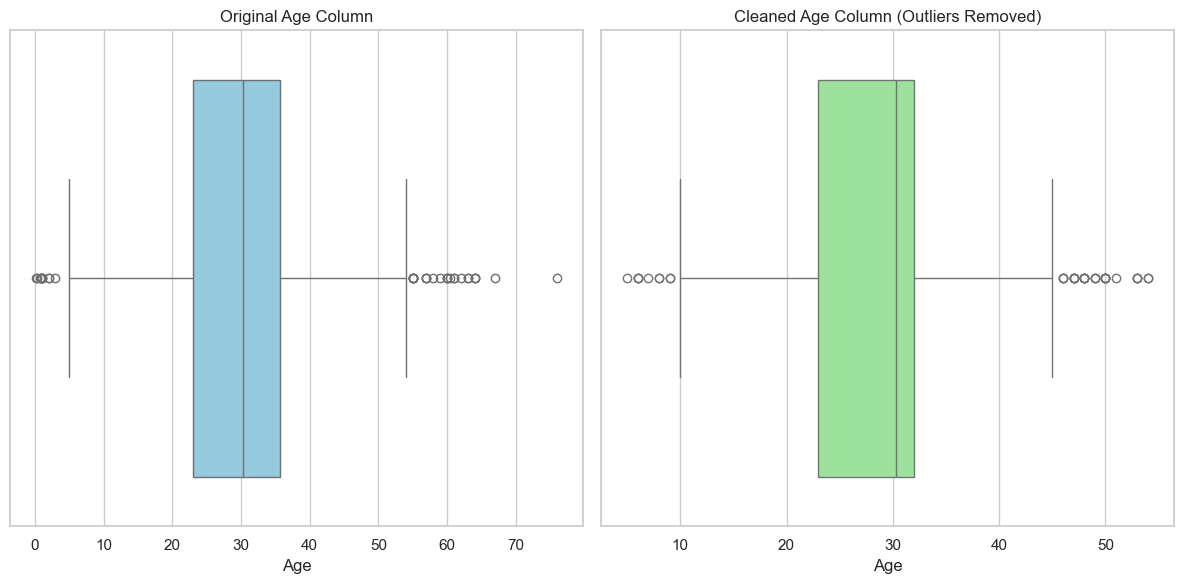

Summary Statistics of Original 'Age' Column:
count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

Summary Statistics of Cleaned 'Age' Column:
count    382.000000
mean      29.155609
std        9.434611
min        5.000000
25%       23.000000
50%       30.272590
75%       32.000000
max       54.000000
Name: Age, dtype: float64


In [553]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots to check the 'Age' column before and after removing outliers
plt.figure(figsize=(12, 6))

# Boxplot for the original 'Age' column
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Original Age Column')

# Boxplot for the cleaned 'Age' column
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['Age'], color='lightgreen')
plt.title('Cleaned Age Column (Outliers Removed)')

plt.tight_layout()
plt.show()

# Summary statistics for both the original and cleaned 'Age' columns
print("Summary Statistics of Original 'Age' Column:")
print(df['Age'].describe())
print("\nSummary Statistics of Cleaned 'Age' Column:")
print(df_cleaned['Age'].describe())


# **EDA**


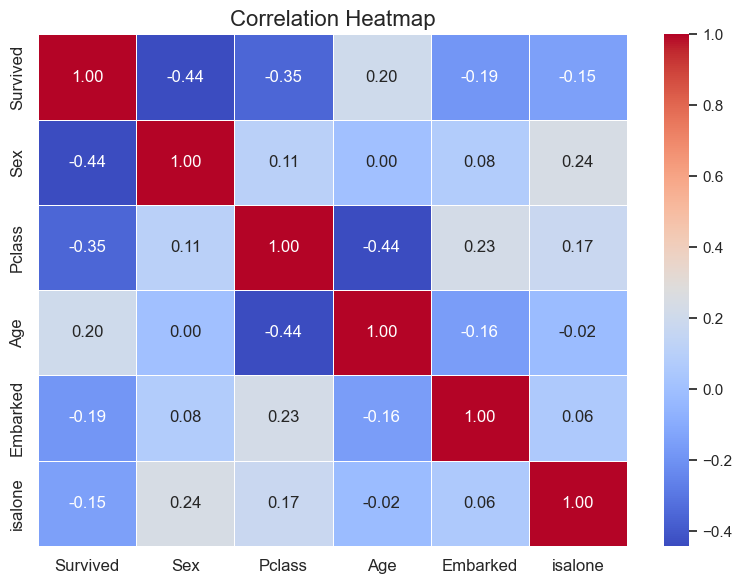

In [554]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns for correlation
numerical = ['Survived', 'Sex', 'Pclass', 'Age', 'Embarked', 'isalone']

# Compute the correlation matrix
corr_matrix = df[numerical].corr()

# Plotting the heatmap with the 'coolwarm' palette
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


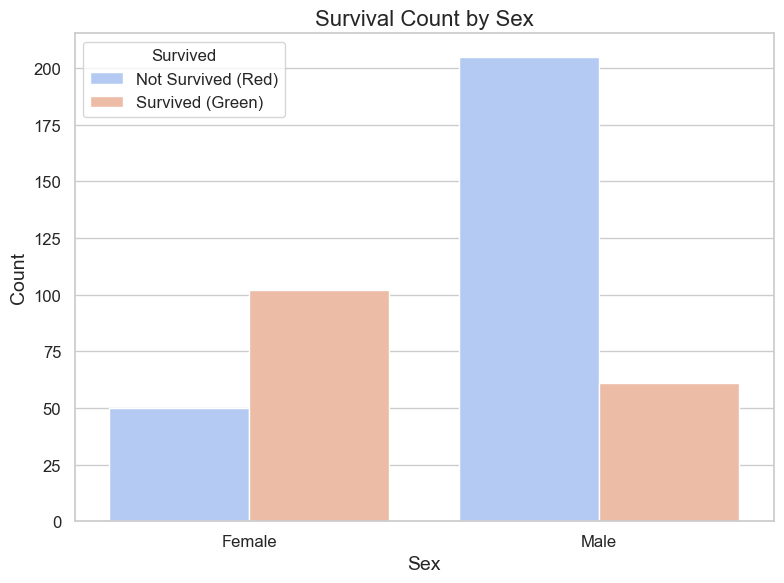

In [555]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Sex and Survived to count occurrences
sex_survival_counts = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(
    data=sex_survival_counts,
    x='Sex',
    y='Count',
    hue='Survived',
    palette='coolwarm'
)

# Add labels and title
plt.title('Survival Count by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Manually create the legend using the correct handles
handles, labels = bar_plot.get_legend_handles_labels()
plt.legend(
    handles,
    ['Not Survived (Red)', 'Survived (Green)'],
    title='Survived',
    fontsize=12,
    title_fontsize=12
)

# Adjust x-axis labels to show "Female" for 0 and "Male" for 1
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


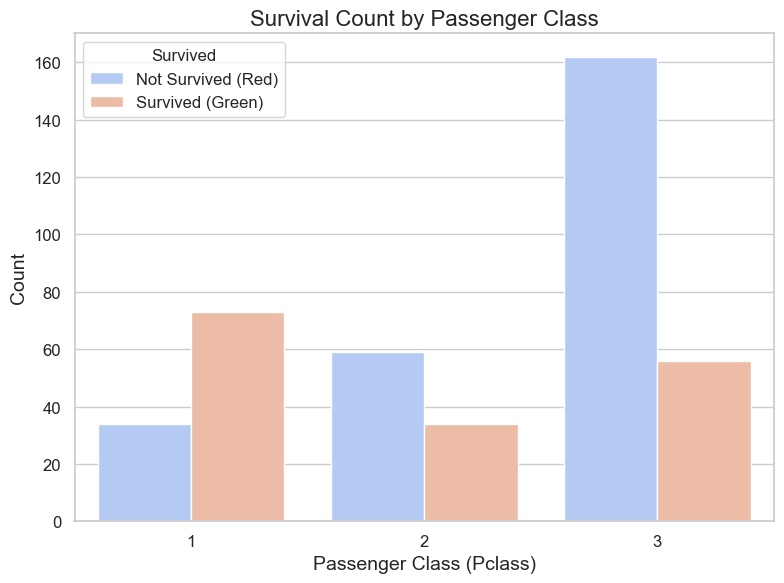

In [556]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot to show survival counts by Passenger Class (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='coolwarm')

# Add labels and title
plt.title('Survival Count by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class (Pclass)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(
    title='Survived', 
    labels=['Not Survived (Red)', 'Survived (Green)'], 
    fontsize=12, 
    title_fontsize=12
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


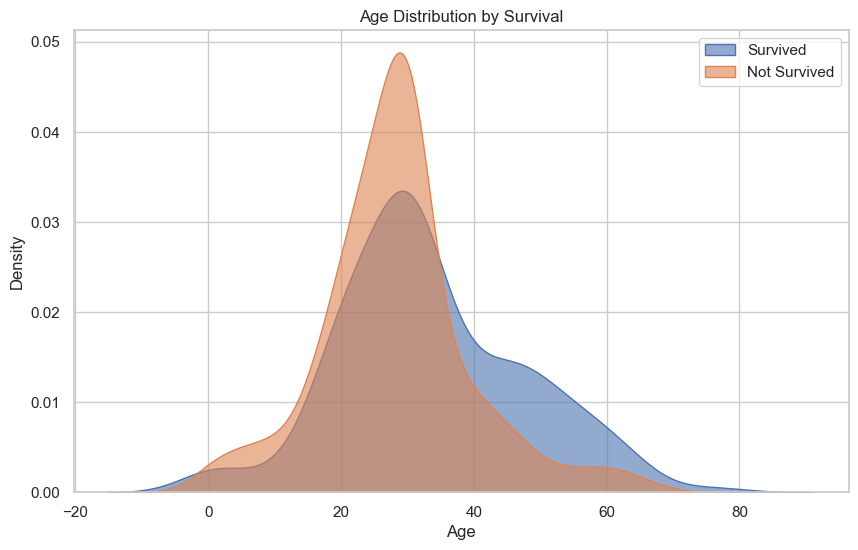

In [557]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', fill=True, label='Survived', alpha=0.6)
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', fill=True, label='Not Survived', alpha=0.6)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

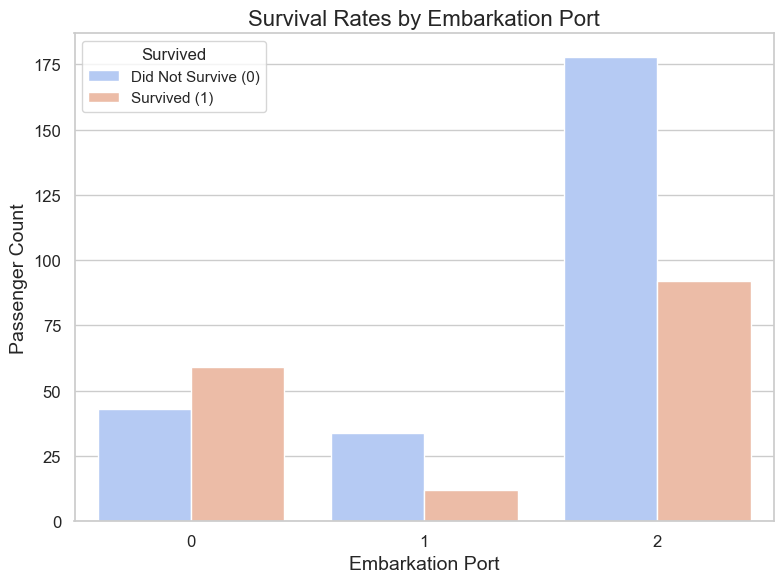

In [558]:


# Create the plot
def plot_survival_vs_embarked(data):
    # Set plot style
    sns.set(style="whitegrid")

    # Create a countplot with hue as Survived
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Embarked', hue='Survived', palette='coolwarm')

    # Add labels and title
    plt.title('Survival Rates by Embarkation Port', fontsize=16)
    plt.xlabel('Embarkation Port', fontsize=14)
    plt.ylabel('Passenger Count', fontsize=14)
    plt.legend(title='Survived', labels=['Did Not Survive (0)', 'Survived (1)'])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
# Assuming your DataFrame is named 'titanic_data'
plot_survival_vs_embarked(df)


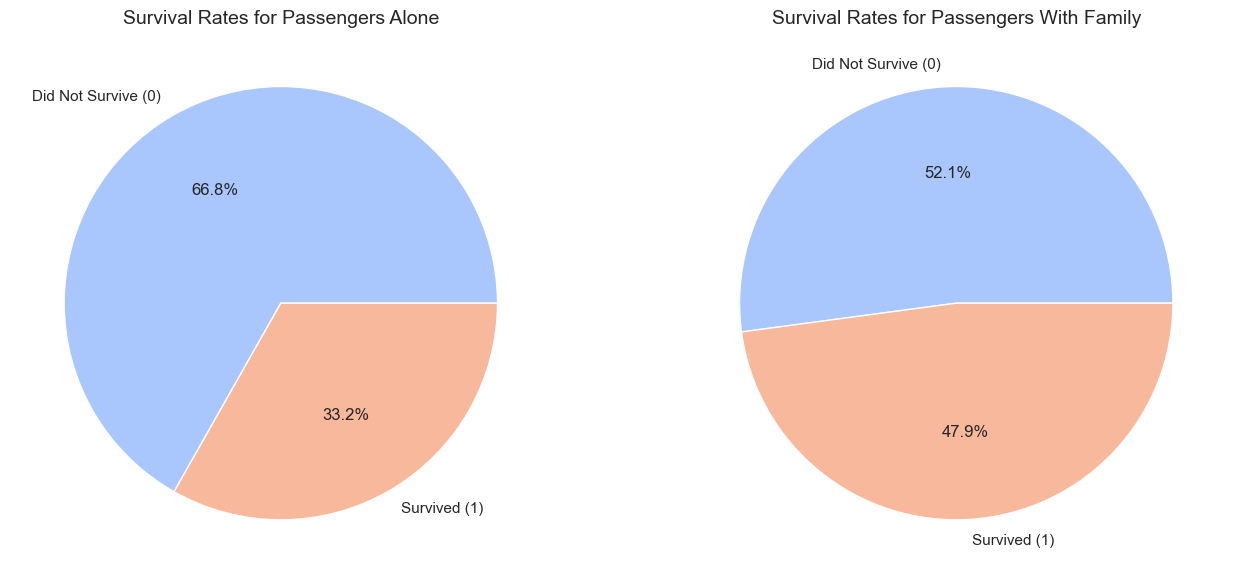

In [559]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
def plot_survival_vs_isalone(data):
    # Set plot style
    sns.set(style="whitegrid")

    # Aggregate data: count the survival rates based on 'isalone'
    survival_counts = data.groupby(['isalone', 'Survived']).size().unstack(fill_value=0)

    # Get colors from the coolwarm palette
    colors = sns.color_palette("coolwarm", 2)  # Extract two colors for the pie chart

    # Plotting a pie chart for survival rates for passengers who are alone and those with family
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot pie chart for passengers alone
    alone_counts = survival_counts.loc[1]  # For isalone == 1 (Alone)
    axes[0].pie(alone_counts, labels=['Did Not Survive (0)', 'Survived (1)'], autopct='%1.1f%%', colors=colors)
    axes[0].set_title('Survival Rates for Passengers Alone', fontsize=14)

    # Plot pie chart for passengers with family
    family_counts = survival_counts.loc[0]  # For isalone == 0 (With Family)
    axes[1].pie(family_counts, labels=['Did Not Survive (0)', 'Survived (1)'], autopct='%1.1f%%', colors=colors)
    axes[1].set_title('Survival Rates for Passengers With Family', fontsize=14)

    plt.tight_layout()
    plt.show()

# Example usage
# Assuming your DataFrame is named 'df' and contains the 'isalone' and 'Survived' columns
plot_survival_vs_isalone(df)


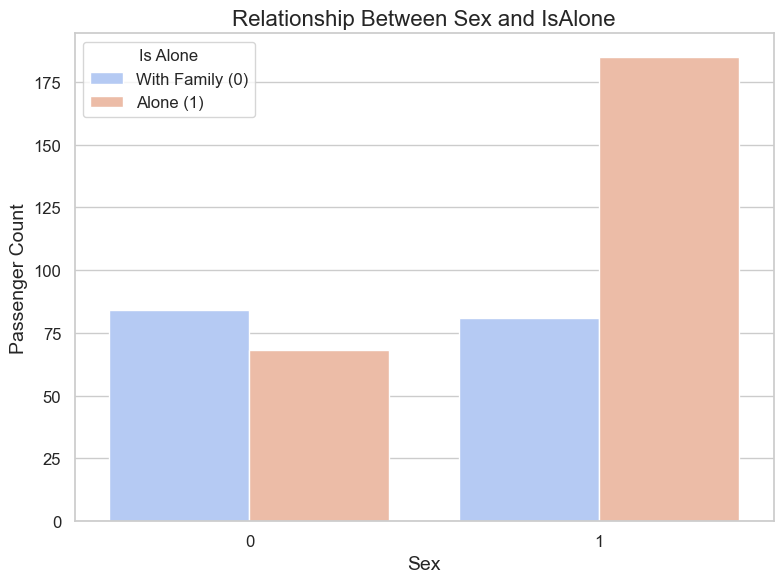

In [560]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
def plot_sex_vs_isalone(data):
    # Set plot style
    sns.set(style="whitegrid")

    # Create a countplot to show the relationship between 'Sex' and 'isalone'
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Sex', hue='isalone', palette='coolwarm')

    # Add labels and title
    plt.title('Relationship Between Sex and IsAlone', fontsize=16)
    plt.xlabel('Sex', fontsize=14)
    plt.ylabel('Passenger Count', fontsize=14)
    plt.legend(title='Is Alone', labels=['With Family (0)', 'Alone (1)'], fontsize=12, title_fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
# Assuming your DataFrame is named 'df' and contains the 'Sex' and 'isalone' columns
plot_sex_vs_isalone(df)


# **building the model**


# normalisation

In [561]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'Age' column
df['Age'] = scaler.fit_transform(df[['Age']])

# Check the first few rows to see the normalized 'Age'
print(df[['Age']].head())


        Age
0  0.452723
1  0.617566
2  0.815377
3  0.353818
4  0.287881


In [562]:
df.head()

,Pclass,Sex,Age,Embarked,Survived,isalone
0,3,1,0.452723,1,0,1
1,3,0,0.617566,2,0,0
2,2,1,0.815377,1,0,1
3,3,1,0.353818,2,0,1
4,3,0,0.287881,2,1,0


In [563]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'Pclass' column (assuming it's an integer feature)
df['Pclass'] = scaler.fit_transform(df[['Pclass']])

# Check the first few rows to see the normalized 'Pclass'
print(df[['Pclass']].head())


   Pclass
0     1.0
1     1.0
2     0.5
3     1.0
4     1.0


In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   Embarked  418 non-null    int32  
 4   Survived  418 non-null    int64  
 5   isalone   418 non-null    int32  
dtypes: float64(2), int32(3), int64(1)
memory usage: 14.8 KB


In [565]:
df.head()

,Pclass,Sex,Age,Embarked,Survived,isalone
0,1.0,1,0.452723,1,0,1
1,1.0,0,0.617566,2,0,0
2,0.5,1,0.815377,1,0,1
3,1.0,1,0.353818,2,0,1
4,1.0,0,0.287881,2,1,0


Logistic Regression Accuracy: 0.7698

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        78
           1       0.73      0.62      0.67        48

    accuracy                           0.77       126
   macro avg       0.76      0.74      0.75       126
weighted avg       0.77      0.77      0.77       126



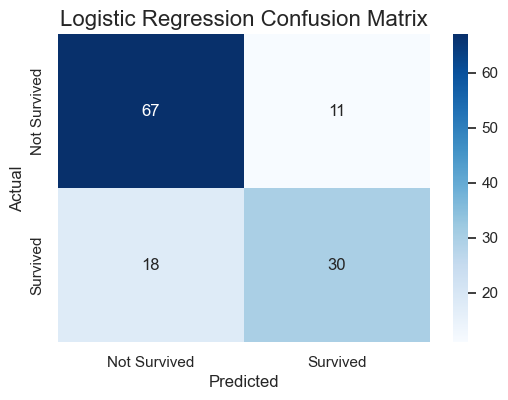

Random Forest Accuracy: 0.7698

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        78
           1       0.73      0.62      0.67        48

    accuracy                           0.77       126
   macro avg       0.76      0.74      0.75       126
weighted avg       0.77      0.77      0.77       126



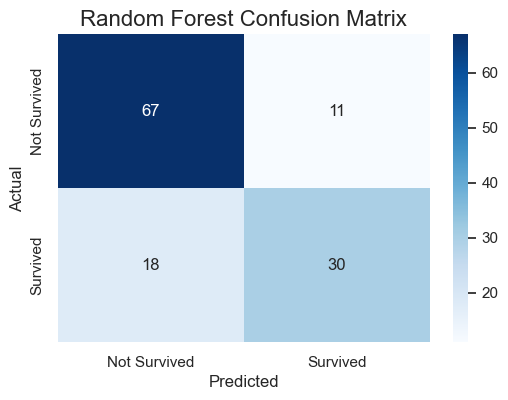

Support Vector Machine (SVM) Accuracy: 0.7698

Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        78
           1       0.73      0.62      0.67        48

    accuracy                           0.77       126
   macro avg       0.76      0.74      0.75       126
weighted avg       0.77      0.77      0.77       126



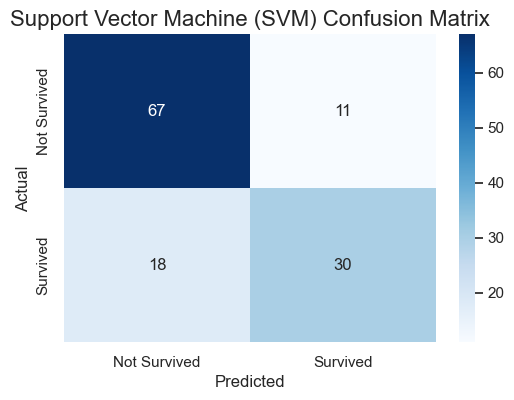

K-Nearest Neighbors (KNN) Accuracy: 0.5317

K-Nearest Neighbors (KNN) Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.27      0.42        78
           1       0.45      0.96      0.61        48

    accuracy                           0.53       126
   macro avg       0.68      0.61      0.51       126
weighted avg       0.74      0.53      0.49       126



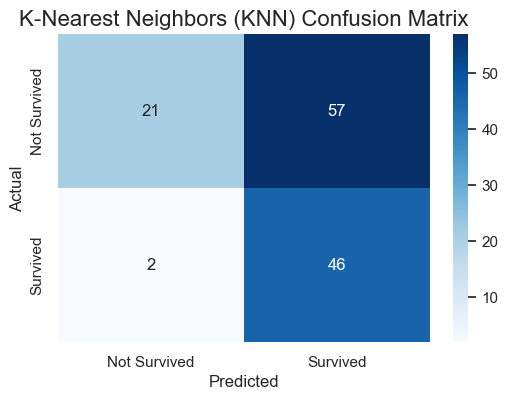

Gradient Boosting Machine (GBM) Accuracy: 0.7698

Gradient Boosting Machine (GBM) Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        78
           1       0.73      0.62      0.67        48

    accuracy                           0.77       126
   macro avg       0.76      0.74      0.75       126
weighted avg       0.77      0.77      0.77       126



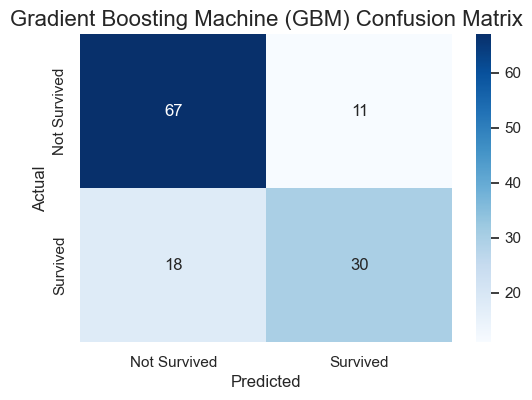

In [566]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare features (X) and target (y)
X = df.drop(['Survived', 'Age', 'Pclass'], axis=1)  # Drop original 'Age' and 'Pclass' columns
y = df['Survived']  # Target variable
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine (SVM)': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting Machine (GBM)': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    
    # Print classification report
    print(f'\n{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'{model_name} Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()


In [567]:
df.head()


,Pclass,Sex,Age,Embarked,Survived,isalone
0,1.0,1,0.452723,1,0,1
1,1.0,0,0.617566,2,0,0
2,0.5,1,0.815377,1,0,1
3,1.0,1,0.353818,2,0,1
4,1.0,0,0.287881,2,1,0
